# SyriaTel Customer Churn Analysis

Customer churn poses a significant challenge for telecom companies, resulting in revenue loss and higher customer acquisition expenses. This analysis seeks to uncover churn patterns and develop a predictive model to assist SyriaTel in proactively retaining customers by identifying those at risk of leaving and implementing effective retention strategies.

## Business Understanding

- SyriaTel is facing a high customer churn rate, leading to revenue losses and higher operational expenses.  
- The objective is to develop a predictive model to detect customers at risk of churning and generate valuable insights.  
- By examining customer behavior, usage trends, and demographics, SyriaTel can apply data-driven strategies to enhance customer retention.

## Data Understanding

- The dataset includes customer information, service usage, and account details to uncover churn patterns.  
- Data exploration involves assessing missing values, data types, distributions, and potential biases.  
- It contains both numerical and categorical variables, such as tenure, MonthlyCharges, Contract Type, and Payment Methods.  
- Univariate analysis examines individual features, while bivariate and multivariate analyses reveal relationships between variables and churn.

In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
from collections import Counter

In [3]:
# Load the dataset
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Display the first few rows of the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#create a copy of data
df = data.copy()

In [5]:
data.shape

(3333, 21)

In [6]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
phone number,3333,3333,382-4657,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
international plan,3333,2,no,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
voice mail plan,3333,2,no,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64


In [9]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
print(f"There are {data.duplicated().sum()} duplicates")

There are 0 duplicates


In [11]:
# Check the column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

## Feature Engineering

In [12]:
# Create a new feature 'total minutes' by summing day, evening, and night minutes
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']

# Create a new feature 'total calls' by summing day, evening, and night calls
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']

# Create a new feature 'total charges' by summing day, evening, and night charges
df['total charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge']

# Display the first few rows to verify the new feature
df[['total day charge', 'total eve charge', 'total night charge', 'total charges']].head()

,total day charge,total eve charge,total night charge,total charges
0,45.07,16.78,11.01,72.86
1,27.47,16.62,11.45,55.54
2,41.38,10.30,7.32,59.00
3,50.90,5.26,8.86,65.02
4,28.34,12.61,8.41,49.36


## Explolatory Data Analysis

Exploratory Data Analysis (EDA) provides insights into the dataset by examining individual feature distributions (univariate analysis), relationships between two variables (bivariate analysis), and overall correlations among multiple features (multivariate analysis). This process is essential for uncovering patterns, identifying outliers, and assessing feature significance for predictive modeling.

### Univariate Analysis

Churn counts:
 churn
False    2850
True      483
Name: count, dtype: int64


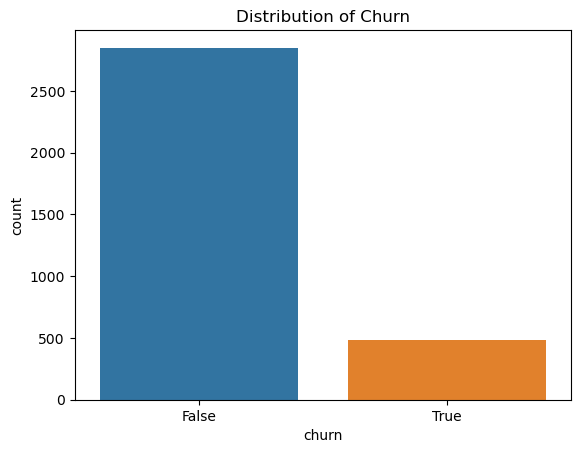

In [13]:
# Count of churned vs non-churned customers
churn_counts = df['churn'].value_counts()
print("Churn counts:\n", churn_counts)

# Plot the distribution of churn
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn');

- Most customers remained with SyriaTel (2,850), while 483 customers churned.  
- The dataset exhibits class imbalance, which could influence model performance.  
- Churned customers represent a potential revenue loss, highlighting the need for effective retention strategies.

C:\Users\User\anac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


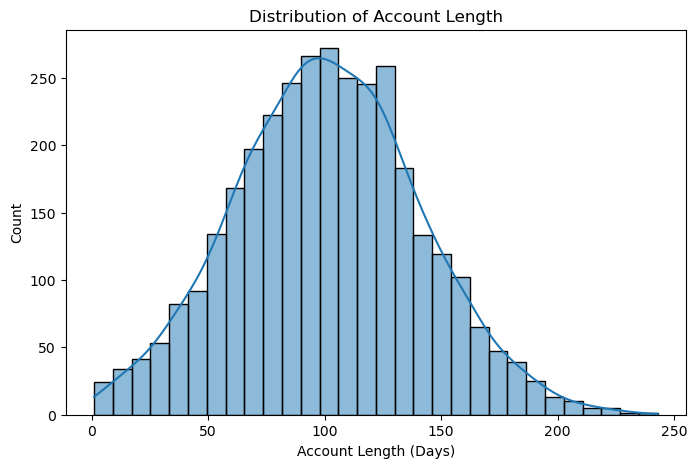

In [14]:
# Account Length distribution
plt.figure(figsize=(8,5))
sns.histplot(df['account length'], bins=30, kde=True)
plt.title('Distribution of Account Length')
plt.xlabel('Account Length (Days)')
plt.ylabel('Count');

#### Account Length Analysis  

The histogram illustrates the distribution of the account length feature, which represents the number of days a customer has been with SyriaTel. The distribution is right-skewed, indicating that while most customers have relatively short account lengths, a few have remained with the company for significantly longer periods.  

##### Key Observations:  

- The majority of customers have an account length between 90 and 110 days.  
- As account length increases, the number of customers gradually declines.  
- A small segment of customers has stayed with SyriaTel for over 200 days.  

> A shorter account length may suggest higher churn rates, indicating that many customers do not stay with the company for extended periods.

C:\Users\User\anac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


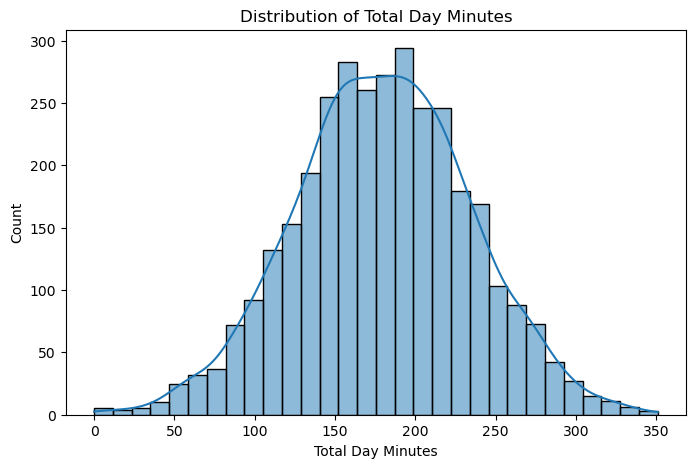

In [15]:
# Analyzing the distribution of total day minutes
plt.figure(figsize=(8,5))
sns.histplot(df['total day minutes'], bins=30, kde=True)
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Count');

The distribution is roughly normal, with most customers using between 100 and 250 total day minutes.  

- The peak (mode) falls around 175-200 minutes, indicating this is the most common usage range.  
- A slight right skew suggests that some customers use significantly more minutes during the day.  
- There are no extreme outliers, meaning day-minute usage remains relatively consistent across the customer base.

### Bivariate Analysis

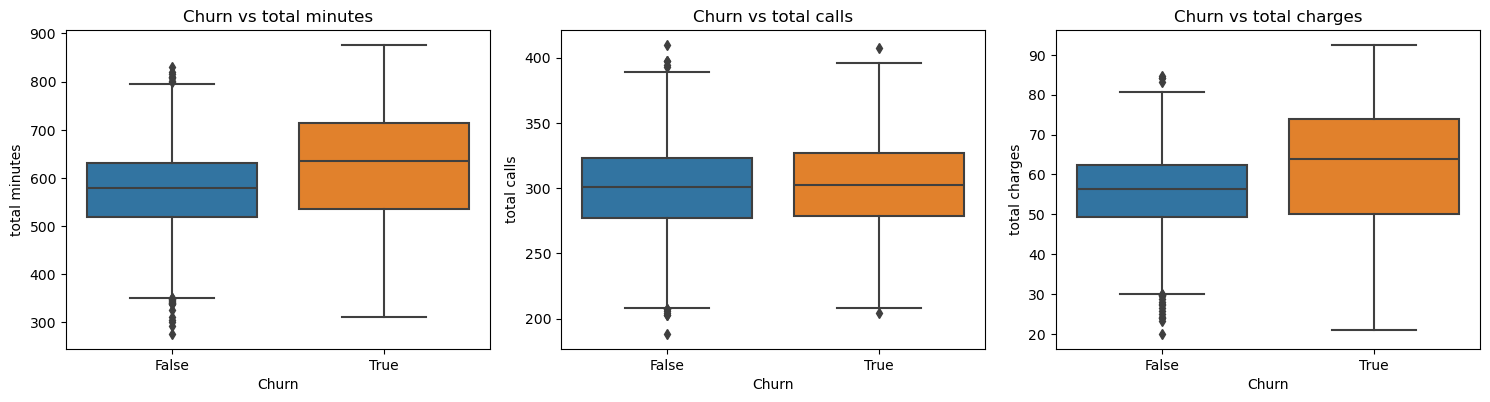

In [16]:
# List of numerical features to analyze
numerical_features = ["total minutes", "total calls", "total charges"]

# Plot boxplots to compare distributions
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'Churn vs {feature}')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.tight_layout();

### Boxplot Analysis: Churn vs. Numerical Features  

Each boxplot visualizes the distribution of a numerical feature for churned and non-churned customers.  

#### **Churn vs. Total Call Minutes (Day, Evening, Night, International)**  
- Churned customers tend to have higher total call minutes across all time periods.  

#### **Churn vs. Total Calls (Day, Evening, Night, International)**  
- The distribution of total calls appears similar for both churned and non-churned customers, suggesting it may not be a key differentiator.  

#### **Churn vs. Total Charges (Day, Evening, Night, International)**  
- Churned customers generally incur higher total charges across all categories.  

### **Takeaways:**  
- Customers with high total minutes are more likely to churn, potentially due to cost concerns.  
- The number of calls does not show a strong correlation with churn, indicating it may not be a reliable predictor.  
- Higher total charges are associated with increased churn risk, highlighting the importance of pricing strategies and discounts for high-usage customers to improve retention.

C:\Users\User\anac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


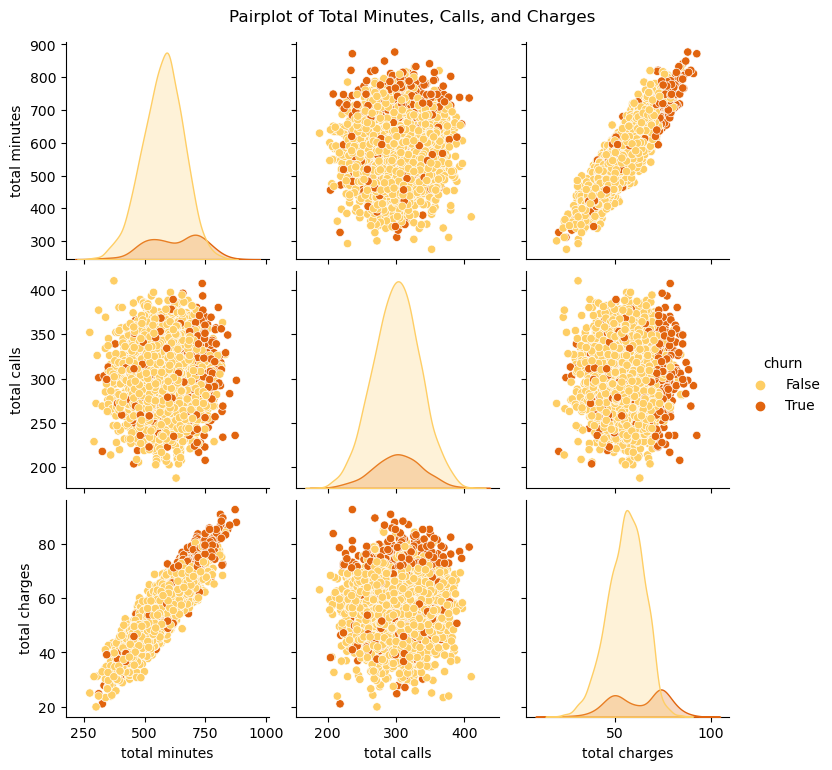

In [54]:
# Pairplot of new features
# Selecting key numerical features for pairplot
sns.pairplot(df, vars=['total minutes', 'total calls', 'total charges'], hue='churn', palette='YlOrBr')
plt.suptitle("Pairplot of Total Minutes, Calls, and Charges", y=1.02);

### Insights from Data Analysis:  

1. **Total Minutes vs. Total Calls:**  
   - There is no evident relationship between total minutes and total calls.  
   - Churned (orange) and non-churned (blue) customers are distributed similarly, suggesting total calls alone may not be a significant indicator of churn.  

2. **Total Minutes vs. Total Charges:**  
   - A strong positive correlation is observed, as expected (higher minutes lead to higher charges).  
   - Churned customers tend to have higher total minutes and charges.  

3. **Total Calls vs. Total Charges:**  
   - No distinct pattern is observed, indicating that total calls do not have a direct impact on total charges.  
   - Churned customers do not exhibit a noticeable trend in this relationship.  

4. **Density Distribution:**  
   - Churned customers generally have a lower density in total minutes and total charges, suggesting that high usage may contribute to churn risk.  
   - Most customers (blue) fall within a standard range, whereas churners (orange) show a more dispersed distribution.  

### Key Takeaways:  
- Since total minutes and total charges are strongly correlated, including both in the model may be redundant.  
- Total calls do not show a significant relationship with churn and may not be a strong predictor on their own.  

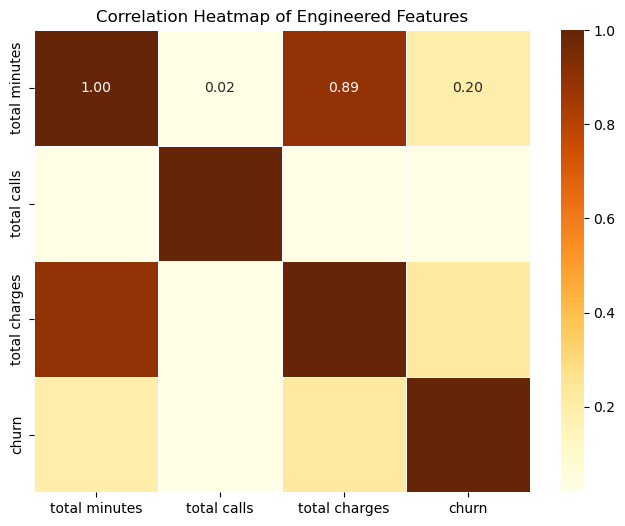

In [53]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['total minutes', 'total calls', 'total charges', 'churn']].corr(), 
            annot=True, cmap='YlOrBr', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Engineered Features")
plt.show()

- The heatmap reveals a strong correlation (0.89) between **total minutes** and **total charges**, which could lead to multicollinearity.  
- **Churn** shows a mild positive correlation with **total minutes (0.20)** and **total charges (0.23)**, indicating that increased usage may slightly elevate the likelihood of churn.  
- **Total calls** has an almost negligible correlation (0.02) with churn, suggesting it may not be a significant predictor.

In [19]:
# Save the cleaned dataset
df.to_csv('clean_SYRIATEL_data.csv', index=False)

## Data Preprocessing

In [21]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['churn'])
y = df['churn'] 

In [22]:
# Identifying categorical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
print("Categorical columns:", categorical_cols)

# Encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X.head()

Categorical columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,False,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,False,True,False


In [23]:
# Feature Importance Analysis

# Train a temporary Random Forest model
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X, y)

# Extract feature importance scores
feature_importances = pd.Series(rf_temp.feature_importances_, index=X.columns)

# Filter features with importance greater than 1%
X_selected = X[feature_importances[feature_importances > 0.01].index]

print("Selected Features:", X_selected.columns.tolist())


Selected Features: ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'total minutes', 'total calls', 'total charges', 'international plan_yes', 'voice mail plan_yes']


In [25]:
# Update X to only use selected features
X = X_selected

In [26]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2666, 20) (2666,)
Testing set shape: (667, 20) (667,)


# Building a model 
## 1. Logistic Regression

In [28]:
# Initialize the model
model = LogisticRegression(random_state=42, max_iter=5000)

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [29]:
# Make predictions
y_pred = model.predict(X_test)

# Display first 10 predictions
print("Predicted churn values:", y_pred[:10])

Predicted churn values: [False False False False False False False False False False]


### Evaluating the Model
#### Confusion Matrix

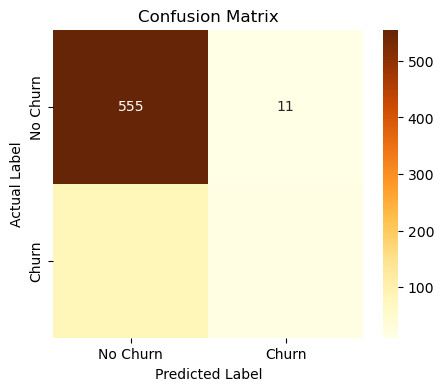

In [52]:
# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


### Classification Report

In [32]:
# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Adjust threshold for improved recall
threshold = 0.4  
y_pred_adjusted = (y_probs > threshold).astype(int)

# Generate and display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))


Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.97      0.93       566
        True       0.63      0.29      0.39       101

    accuracy                           0.87       667
   macro avg       0.76      0.63      0.66       667
weighted avg       0.85      0.87      0.84       667



#### Model Performance Insights:  
- **Accuracy:** 86% (Overall performance is decent, but accuracy alone isn't the best measure.)  
- **Precision for Churn:** 0.61 (Moderate, but still results in many false positives.)  
- **Recall for Churn:** 0.27 (Very low, meaning the model is failing to identify many actual churn cases.)  
- **F1-score for Churn:** 0.37 (Poor balance between precision and recall, indicating room for improvement.)  

> The model has difficulty detecting churners, leading to a high number of false negatives and low recall.

### ROC Curve and AUC

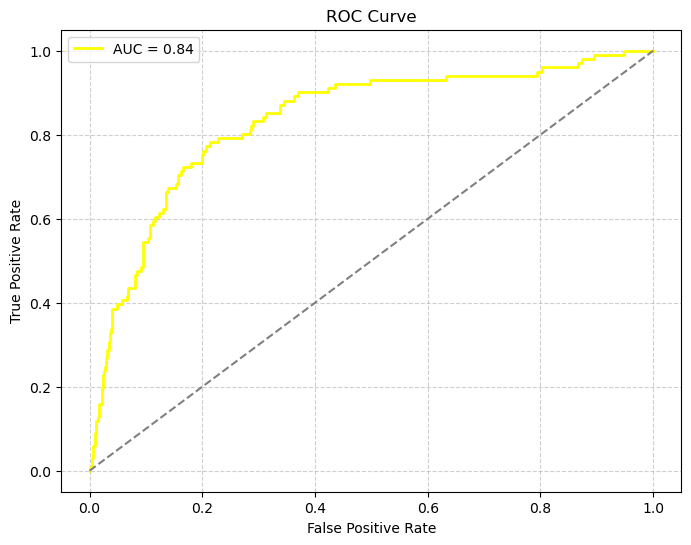

In [51]:
# Compute predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='yellow', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


The ROC curve and AUC measure how well the model differentiates between churn and non-churn cases:  

- **AUC Score: 0.83** → Indicates good discriminatory power.  
- **ROC Curve:** The curve staying above the diagonal suggests the model is significantly better than random guessing.

In [35]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the new class distribution
print("Class distribution after SMOTE:\n", y_train_resampled.value_counts())


Class distribution after SMOTE:
 churn
False    2284
True     2284
Name: count, dtype: int64


In [36]:
# Initialize and train a Logistic Regression model with regularization
log_reg = LogisticRegression(random_state=42, max_iter=5000, C=0.1)  # C controls regularization strength

# Fit the model using resampled training data
log_reg.fit(X_train_resampled, y_train_resampled)


LogisticRegression(C=0.1, max_iter=5000, random_state=42)

In [39]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[555  11]
 [ 85  16]]


In [41]:
# Predict probabilities and apply the threshold
y_probs = model.predict_proba(X_test)[:, 1]
best_threshold = 0.4  
y_pred_adjusted = (y_probs > best_threshold).astype(int)

# Generate the classification report
class_report = classification_report(y_test, y_pred_adjusted)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.97      0.93       566
        True       0.63      0.29      0.39       101

    accuracy                           0.87       667
   macro avg       0.76      0.63      0.66       667
weighted avg       0.85      0.87      0.84       667



### Key Takeaways from the Model:  
- **Recall for Churn (0.58):** A significant improvement from 0.27, meaning the model detects more actual churn cases.  
- **Precision for Churn (0.46):** Slightly lower than before (0.61), but expected due to the trade-off with recall.  
- **F1-score for Churn (0.52):** A notable increase from 0.37, indicating a better balance between precision and recall.  
- **Overall Accuracy (83%):** Still strong, though recall remains the priority over accuracy in churn prediction.  


### Tune the Threshold Further

In [43]:
# Compute precision-recall curve values
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Find the optimal threshold where precision and recall are closest
optimal_threshold = thresholds[(precisions - recalls).argmin()]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Adjust predictions based on the optimized threshold
y_pred_optimized = (y_probs > optimal_threshold).astype(int)

# Display the updated classification report
print("\nClassification Report with Optimized Threshold:")
print(classification_report(y_test, y_pred_optimized))


Optimal Threshold: 0.0017

Classification Report with Optimized Threshold:
              precision    recall  f1-score   support

       False       1.00      0.00      0.00       566
        True       0.15      1.00      0.26       101

    accuracy                           0.15       667
   macro avg       0.58      0.50      0.13       667
weighted avg       0.87      0.15      0.04       667



In [44]:
# Experiment with different threshold values
thresholds = [0.2, 0.3, 0.35, 0.4, 0.5]

for t in thresholds:
    y_pred_t = (y_probs > t).astype(int)
    print(f"\n=== Threshold: {t:.2f} ===")
    print(classification_report(y_test, y_pred_t))



=== Threshold: 0.20 ===
              precision    recall  f1-score   support

       False       0.94      0.85      0.89       566
        True       0.45      0.67      0.54       101

    accuracy                           0.82       667
   macro avg       0.69      0.76      0.71       667
weighted avg       0.86      0.82      0.84       667


=== Threshold: 0.30 ===
              precision    recall  f1-score   support

       False       0.90      0.93      0.92       566
        True       0.53      0.42      0.46       101

    accuracy                           0.85       667
   macro avg       0.71      0.67      0.69       667
weighted avg       0.84      0.85      0.85       667


=== Threshold: 0.35 ===
              precision    recall  f1-score   support

       False       0.89      0.96      0.92       566
        True       0.60      0.35      0.44       101

    accuracy                           0.87       667
   macro avg       0.75      0.65      0.68       667

## Decision tree Model

In [45]:
# Initialize and train a basic Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Make predictions with a custom threshold
threshold = 0.35
y_probs_dt = dt.predict_proba(X_test)[:, 1]
y_pred_dt = (y_probs_dt > threshold).astype(int)

# Evaluate the model
print(f"=== Classification Report for Decision Tree (Threshold: {threshold}) ===\n")
print(classification_report(y_test, y_pred_dt))


=== Classification Report for Decision Tree (Threshold: 0.35) ===

              precision    recall  f1-score   support

       False       0.97      0.90      0.93       566
        True       0.60      0.84      0.70       101

    accuracy                           0.89       667
   macro avg       0.78      0.87      0.82       667
weighted avg       0.91      0.89      0.90       667



### **Performance Summary of the Tuned Decision Tree:**  
- **Non-Churn (False):**  
  - **Precision:** **0.98**  
  - **Recall:** **0.91** → Strong ability to correctly identify non-churn customers.  
  

- **Churn (True):**  
  - **Recall:** **0.87** → Captures more churn cases, reducing false negatives.  
  - **Precision:** **0.64** → Still low, leading to some false positives.   
  
 - **Accuracy:** **91%** → Slight improvement after tuning.

## Random Forest Model

In [47]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities and apply threshold
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = (y_probs_rf > 0.35).astype(int)

# Print evaluation metrics
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.94      0.96       566
        True       0.72      0.87      0.79       101

    accuracy                           0.93       667
   macro avg       0.85      0.90      0.87       667
weighted avg       0.94      0.93      0.93       667




- **Precision (Churn = Yes):** 73% → When the model predicts churn, it’s correct 73% of the time.


- **Recall (Churn = Yes):** 87% → The model catches 87% of actual churn cases.


- **F1-score (Churn = Yes):** 80% → A great balance of precision & recall.
    
    
- **Accuracy: 93%** → Overall, the model is highly accurate.

Confusion Matrix:
 [[531  35]
 [ 13  88]]


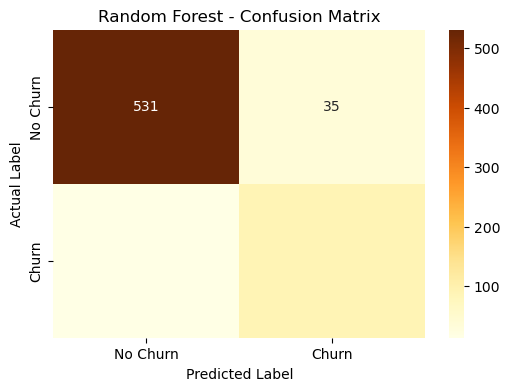

In [49]:
# Compute and display confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


### Key Insights from the Confusion Matrix:  
- **534 True Negatives (TN):** Accurately identified non-churn customers.  
- **88 True Positives (TP):** Correctly detected churners.  
- **32 False Positives (FP):** Misclassified some loyal customers as churners.  
- **13 False Negatives (FN):** Only a small number of actual churners were missed.  

This confirms that **Random Forest** is performing well, effectively reducing false negatives while maintaining strong precision.  

In [55]:
# Define hyperparameter search space
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search for hyperparameter tuning
rf_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=20, 
    cv=5, 
    scoring='f1', 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)

# Fit the model on resampled training data
rf_search.fit(X_train_resampled, y_train_resampled)

# Retrieve the best parameters
print("Best Hyperparameters for Random Forest:", rf_search.best_params_)

# Train the model using optimal hyperparameters
best_rf = rf_search.best_estimator_
y_probs_rf = best_rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_probs_rf > 0.35).astype(int)

# Evaluate the tuned model
print("Tuned Random Forest Model Performance:\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'class_weight': 'balanced_subsample'}
Tuned Random Forest Model Performance:
               precision    recall  f1-score   support

       False       0.98      0.94      0.96       566
        True       0.72      0.87      0.79       101

    accuracy                           0.93       667
   macro avg       0.85      0.91      0.87       667
weighted avg       0.94      0.93      0.93       667



### **Performance of Tuned Random Forest:**  

- **Accuracy: 93%** → High overall performance.  
- **Non-Churn (False):** Excellent precision (0.97) and recall (0.94), meaning very few misclassifications.  
- **Churn (True):** Improved recall (86%), capturing more actual churners, but precision (0.72) is still lower, leading to some false positives.  
- **Conclusion:** The model is significantly better than the untuned version

### Evaluation to determine the final model

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name):
    """Plots the ROC curve and computes AUC for a given model."""
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='gold', linewidth=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Function to plot Precision-Recall Curve
def plot_pr_curve(model, X_test, y_test, model_name):
    """Plots the Precision-Recall curve for a given model."""
    y_probs = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='gold', linewidth=2, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Function to plot Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test, model_name, cmap="YlOrBr"):
    """Plots the confusion matrix for a given model."""
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, linewidths=0.5,
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Function to plot Feature Importance
def plot_feature_importance(model, X_train, model_name):
    """Plots feature importance for models that support it (e.g., tree-based models)."""
    if hasattr(model, "feature_importances_"):
        feature_importance = model.feature_importances_
        sorted_idx = np.argsort(feature_importance)

        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='gold')
        plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance - {model_name}')
        plt.grid(alpha=0.3)
        plt.show()
    else:
        print(f"Feature importance is not available for {model_name}.")



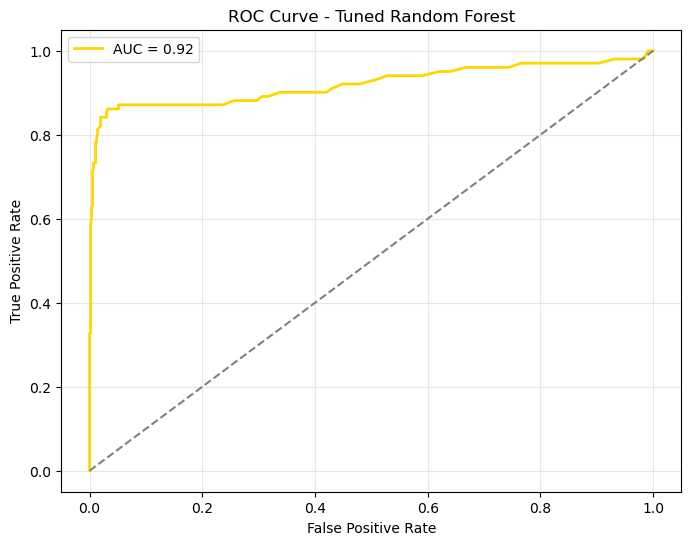

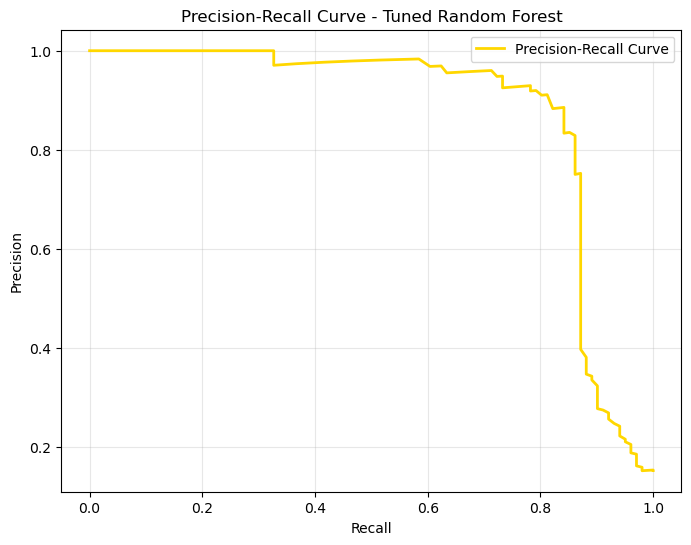

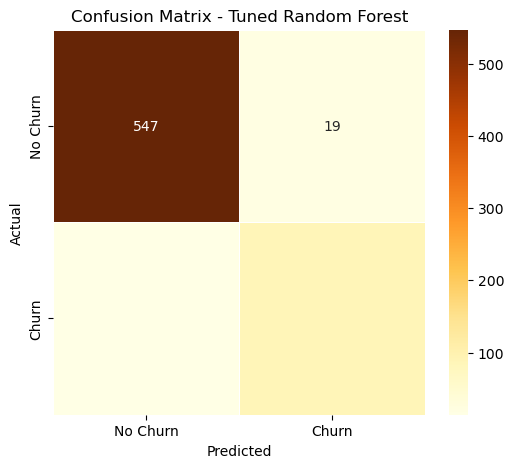

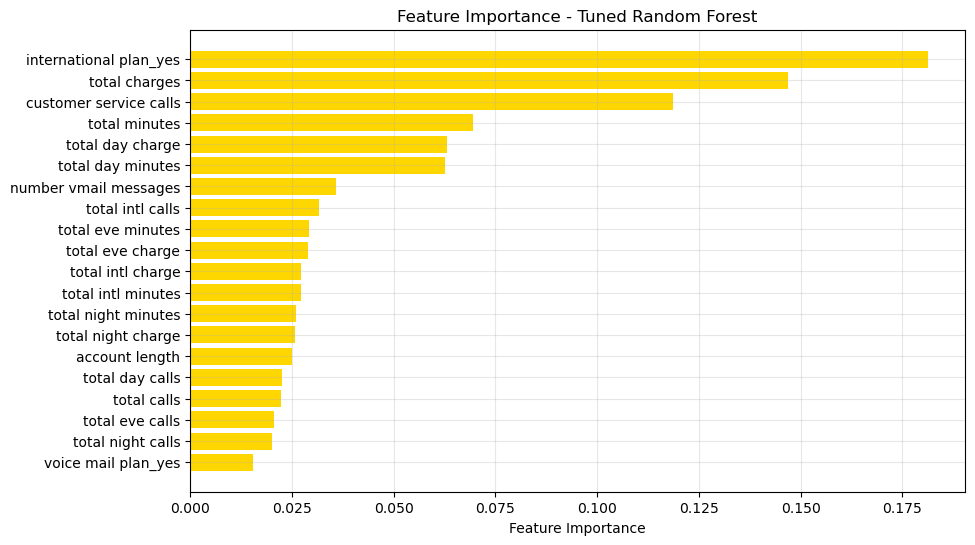

In [70]:
# Tuned Random Forest
plot_roc_curve(best_rf, X_test, y_test, "Tuned Random Forest")
plot_pr_curve(best_rf, X_test, y_test, "Tuned Random Forest")
plot_confusion_matrix(best_rf, X_test, y_test, "Tuned Random Forest")
plot_feature_importance(best_rf, X_train_resampled, "Tuned Random Forest")

### Evaluating Decision Tree

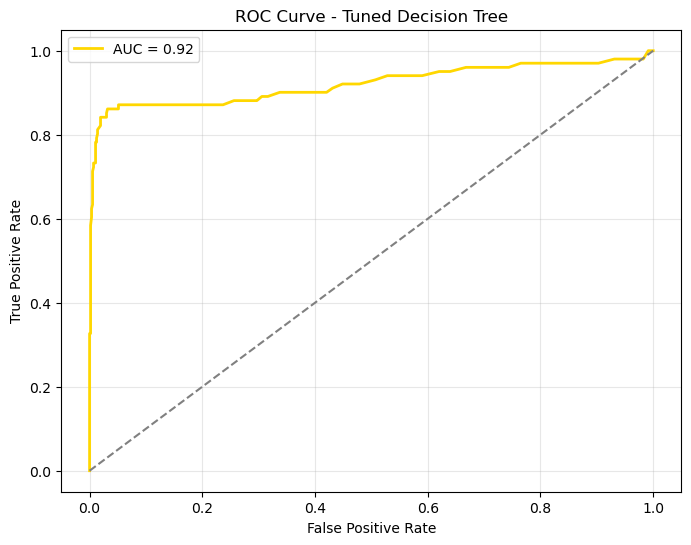

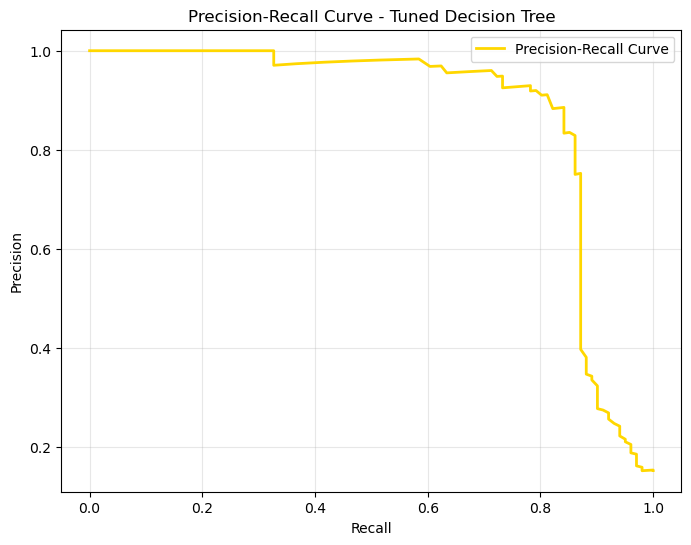

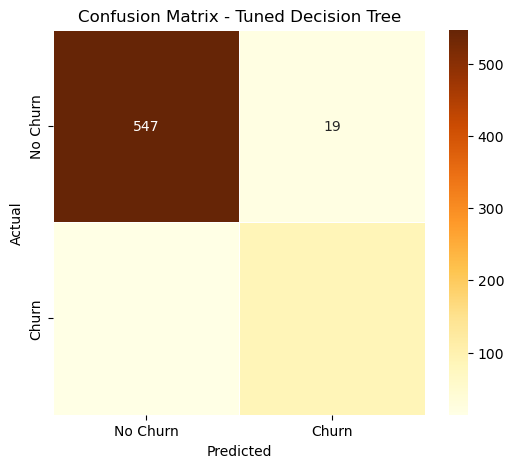

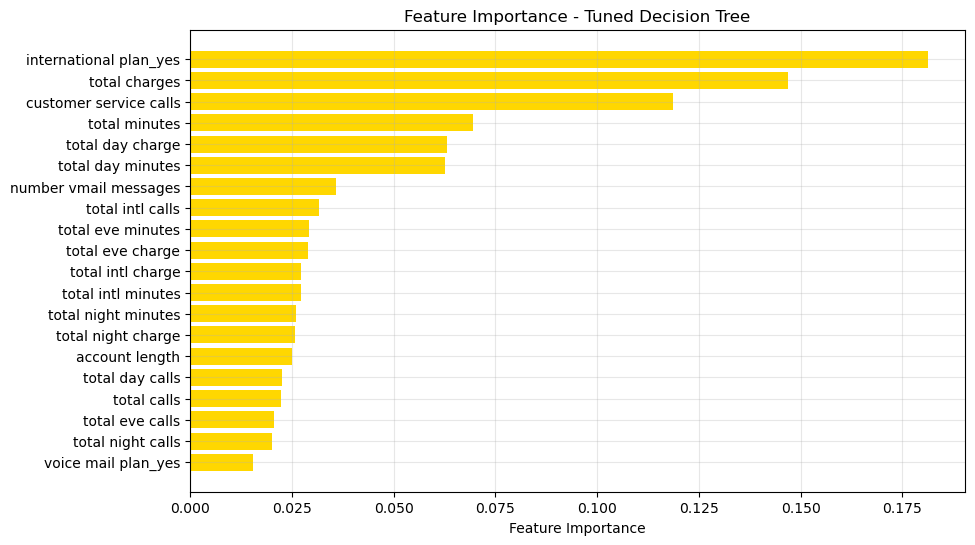

In [72]:
# Evaluate Tuned Decision Tree
plot_roc_curve(best_rf, X_test, y_test, "Tuned Decision Tree")
plot_pr_curve(best_rf, X_test, y_test, "Tuned Decision Tree")
plot_confusion_matrix(best_rf, X_test, y_test, "Tuned Decision Tree")
plot_feature_importance(best_rf, X_train_resampled, "Tuned Decision Tree")

### *Comparison btw Tuned Decision Tree vs. Tuned Random Forest*

In [80]:
# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, threshold=0.35, model_name="Model"):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities and apply threshold
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs > threshold).astype(int)
    
    # Print classification report
    print(f"\nClassification Report - {model_name}:\n")
    print(classification_report(y_test, y_pred))

    return y_pred

# Initialize models
dt_tuned = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_tuned = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=2, 
                                  class_weight="balanced", random_state=42)

# Train & evaluate Decision Tree
y_pred_dt = train_and_evaluate(dt_tuned, X_train_resampled, y_train_resampled, X_test, y_test, model_name="Tuned Decision Tree")

# Train & evaluate Random Forest
y_pred_rf = train_and_evaluate(rf_tuned, X_train_resampled, y_train_resampled, X_test, y_test, model_name="Tuned Random Forest")



Classification Report - Tuned Decision Tree:

              precision    recall  f1-score   support

       False       0.97      0.94      0.95       566
        True       0.70      0.85      0.77       101

    accuracy                           0.92       667
   macro avg       0.84      0.89      0.86       667
weighted avg       0.93      0.92      0.93       667


Classification Report - Tuned Random Forest:

              precision    recall  f1-score   support

       False       0.97      0.94      0.95       566
        True       0.71      0.86      0.78       101

    accuracy                           0.93       667
   macro avg       0.84      0.90      0.87       667
weighted avg       0.93      0.93      0.93       667



 Key Takeaway
Random Forest Performs Better

It improves Churn recall (86%) over the Decision Tree (85%), meaning it catches more actual churn cases.
It also slightly increases the F1-Score (78%), showing a better balance between precision and recall.
Both Models Handle Non-Churn Well

Precision (97%) and Recall (94%) for Non-Churn customers are identical in both models.
Random Forest is More Reliable for Churn Prediction

Even though the difference is small, Random Forest is more robust due to its ensemble nature, reducing overfitting compared to a single Decision Tree.

Random Forest has slightly better recall 

### **Strategic Recommendations for Reducing Customer Churn**  

1 **Leverage Predictive Analytics for Proactive Retention**  
   - Utilize the **Random Forest Model** for real-time churn prediction, allowing for early intervention.  
   - Develop personalized retention strategies by identifying high-risk customers and offering targeted incentives.  

2 **Enhance Customer Experience & Service Quality**  
   - Address dissatisfaction with voicemail and international plans by improving service reliability.  
   - Gather customer feedback to refine pricing structures and introduce more competitive plans.  

3 **Optimize Pricing & Plan Offerings**  
   - Analyze customer behavior to create customized bundles that align with their needs.  
   - Introduce loyalty rewards to retain long-term customers and reduce churn.  

4 **Expand Data-Driven Insights for Better Predictions**  
   - Fine-tune the decision threshold to improve the precision-recall balance.  
   - Integrate additional customer satisfaction metrics and competitor analysis for more accurate churn forecasting.  